In [2]:
"""
!pip install monkeylearn
!pip install opendatasets
!pip install contractions
!pip install textBlob
!pip install spacy

"""

'\n!pip install monkeylearn\n!pip install opendatasets\n!pip install contractions\n!pip install textBlob\n!pip install spacy\n\n'

In [1]:
# library imports
import pandas as pd
import opendatasets
import contractions
from monkeylearn import MonkeyLearn
from textblob import TextBlob
from tqdm.notebook import tqdm_notebook
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import time
import spacy
import re
sns.set_palette('viridis')

In [2]:
# !python -m spacy download en_core_web_sm
# load a trained English pipeline 
nlp = spacy.load("en_core_web_sm")

# initiate tqdm for pandas.apply() functions
tqdm_notebook.pandas()

In [3]:
# suppress all warnings
warnings.simplefilter('ignore')

# expand notebook display options for dataframes
pd.set_option('display.max_colwidth', 200)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 300

In [4]:
noise = pd.read_csv('Reviews_Noise.csv')
boat = pd.read_csv('Reviews_boAt.csv')
fireboltt = pd.read_csv('Reviews_FireBoltt.csv')

df = pd.concat([noise,boat,fireboltt])
df = df.iloc[:, 1:]

In [5]:
df_review = df.iloc[:,5:]

# make all characters uniformly lowercase
df_review['Review'] = df_review['Review'].apply(lambda x: x.lower())

In [6]:
df_band = df_review[(df_review['Review'].str.contains(r'band?\b')) |
                       (df_review['Review'].str.contains(r'strap?\b'))]

df_battery = df_review[(df_review['Review'].str.contains(r'battery?\b')) |
                       (df_review['Review'].str.contains(r'backup?\b'))]

df_display = df_review[(df_review['Review'].str.contains(r'display?\b')) |
                      (df_review['Review'].str.contains(r'notification?\b'))]
                    
df_design = df_review[(df_review['Review'].str.contains(r'design?\b')) |
                      (df_review['Review'].str.contains(r'look?\b'))]

df_price = df_review[(df_review['Review'].str.contains(r'price?\b')) |
                       (df_review['Review'].str.contains(r'money?\b')) |
                    (df_review['Review'].str.contains(r'value?\b'))]

#df_a_tracking = df_review[(df_review['Review'].str.contains(r'spo2?\b')) |
                      # (df_review['Review'].str.contains(r'heart?\b'))]

In [7]:
print(df_band.shape, df_battery.shape, df_display.shape, df_design.shape, df_price.shape)

(246, 2) (1461, 2) (1147, 2) (803, 2) (2261, 2)


In [8]:
df_band['Review'] = df_band['Review'].str.replace('strap','band')
df_battery['Review'] = df_battery['Review'].str.replace('backup','battery')
df_design['Review'] = df_design['Review'].str.replace('look','design')
df_price['Review'] = df_price['Review'].str.replace('money','price')
df_price['Review'] = df_price['Review'].str.replace('value','price')
df_display['Review'] = df_display['Review'].str.replace('notification', 'display')

In [9]:
def opinion_parser(text, term):
    t = []
    tokens = text.split(" ")
    try:
        ind = tokens.index(term)
        start = ind-5
        end = ind+11
        start = 0 if start < 0 else start
        end = len(tokens) if end > len(tokens) else end
        for i in range(start, end):
            t.append(tokens[i])
        return " ".join(t)
    except:
        return ""

# instantiate the client using your API key
ml = MonkeyLearn('80f628cf42d8d9b77e7dfe59a1a5f4c61e1cbd6b')

# opinion unit extractor
model_id = 'ex_N4aFcea3'

def opinion_parser(text, term):
  """
  Extract the individual opinion unit (or phrase) within the text
  that contains the aspect term. 
  """
  result = ml.extractors.extract(model_id, [text])
  time.sleep(1)
  
  extractions = result.body[0]['extractions']

  opinion_units = []
  num__opinion_units = len(extractions)

  for i in range(num__opinion_units):
    opinion_unit = "".join([extractions[i]['extracted_text']])
    
    if re.search(term, opinion_unit):
      return opinion_unit
  
  return ""

In [10]:
df_band["Opinion"] = df_band["Review"].progress_apply(opinion_parser, term='band')
df_battery["Opinion"] = df_battery["Review"].progress_apply(opinion_parser, term='battery')
df_display["Opinion"] = df_display["Review"].progress_apply(opinion_parser, term='display')
df_design["Opinion"] = df_design["Review"].progress_apply(opinion_parser, term='design')
df_price["Opinion"] = df_price["Review"].progress_apply(opinion_parser, term='price')

  0%|          | 0/246 [00:00<?, ?it/s]

  0%|          | 0/1461 [00:00<?, ?it/s]

  0%|          | 0/1147 [00:00<?, ?it/s]

  0%|          | 0/803 [00:00<?, ?it/s]

  0%|          | 0/2261 [00:00<?, ?it/s]

In [11]:
df_battery

,Rating,Review,Opinion
13,5,this watch was awesome 👍👍.the battery battery of watch is for 1week or more. tracking device is work excellent .it measures my heart beat and steps etc. very well. i am very happy for buying this ...,this watch was awesome 👍👍.the battery battery of watch is for 1week or more. tracking device
14,4,"battery performance is good. it goes with my style. the display is clear. the band is not sweaty at all. loved it. at this price, they are offering a pretty good bargain. however , the spo2 meter ...",battery performance is good. it goes with my style. the display
15,5,i got it @ 1600 in this price i just couldn't ask for anything better than this one....display 4.5/5activity 3/5battery 4/5design( comfortable)4.5/5watch face 4/5it's a great buy for the ones who ...,
45,3,looking and battery 🔋 is too good but some fitch er is not good,looking and battery 🔋 is too good but some fitch er is not
48,1,"i am writing this after using this smart watch for more than a month. only concern is that this watch doesn't charge, charger was connected for only 2 times and stopped working. i don't know what'...","what's wrong with this product. battery battery is very good, but what's the use as it"
...,...,...,...
2410,5,products is good to user friendly with long battery battery easy to 7 days working one time charge.,to user friendly with long battery battery easy to 7 days working one time charge.
2441,4,battery drains fast when music plays,battery drains fast when music plays
2473,4,good product. cons - less watch faces and low battery battery.,less watch faces and low battery battery.
2498,5,very nice products but battery life isn't that much,very nice products but battery life isn't that much


In [12]:
def polarity(text):
  """
  Predict the polarity of the text using TextBlob.
  Results range from negative to positive on a scale of [-1, +1].
  """
  testimonial = TextBlob(text)
  return round(testimonial.sentiment.polarity, 2)

In [13]:
df_band["Polarity"] = df_band["Opinion"].progress_apply(polarity)
df_battery["Polarity"] = df_battery["Opinion"].progress_apply(polarity)
df_display["Polarity"] = df_display["Opinion"].progress_apply(polarity)
df_design["Polarity"] = df_design["Opinion"].progress_apply(polarity)
df_price["Polarity"] = df_price["Opinion"].progress_apply(polarity)

  0%|          | 0/246 [00:00<?, ?it/s]

  0%|          | 0/1461 [00:00<?, ?it/s]

  0%|          | 0/1147 [00:00<?, ?it/s]

  0%|          | 0/803 [00:00<?, ?it/s]

  0%|          | 0/2261 [00:00<?, ?it/s]

In [14]:
def sentiment_analysis(score):
    if(score < 0):
        return "Neg"
    elif(score > 0):
        return "Pos"
    else:
        return "NA"

In [15]:
df_band['Sentiment'] = df_band['Polarity'].apply(sentiment_analysis)
df_battery['Sentiment'] = df_battery['Polarity'].apply(sentiment_analysis)
df_display['Sentiment'] = df_display['Polarity'].apply(sentiment_analysis)
df_design['Sentiment'] = df_design['Polarity'].apply(sentiment_analysis)
df_price['Sentiment'] = df_price['Polarity'].apply(sentiment_analysis)

In [16]:
df_band['Feature'] = 'band'
df_battery['Feature'] = 'battery'
df_display['Feature'] = 'display'
df_design['Feature'] = 'design'
df_price['Feature'] = 'price'

final = pd.concat([df_battery,df_display,df_design,df_price,df_band])
final = final.query('Sentiment != "NA"')

In [17]:
a = pd.DataFrame(final.groupby(['Feature','Sentiment'])['Rating'].count()).reset_index()

In [18]:
b = pd.DataFrame(a.groupby('Feature')['Rating'].sum()).reset_index()
b.rename(columns={'Rating':'Rating_count'}, inplace=True)

In [19]:
c= a.merge(b, on='Feature')

In [20]:
c['Sentiment%'] = (c['Rating']*100)/c['Rating_count']

In [21]:
x = c.iloc[:, [0,1,4]]

In [22]:
x

,Feature,Sentiment,Sentiment%
0,band,Neg,14.743590
1,band,Pos,85.256410
2,battery,Neg,23.069936
3,battery,Pos,76.930064
4,design,Neg,7.608696
5,design,Pos,92.391304
6,display,Neg,22.020725
7,display,Pos,77.979275
8,price,Neg,17.004578
9,price,Pos,82.995422


<AxesSubplot:xlabel='Sentiment%', ylabel='Feature'>

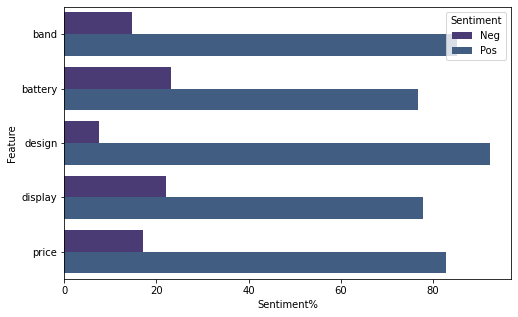

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sentiment%',y='Feature',data=x, hue='Sentiment', orient='h')

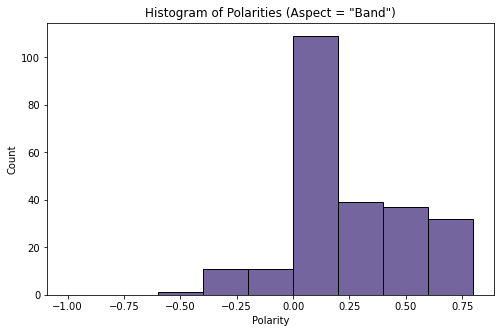

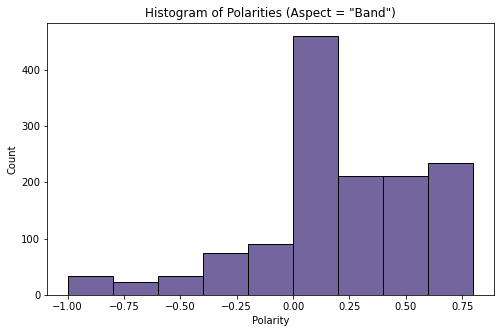

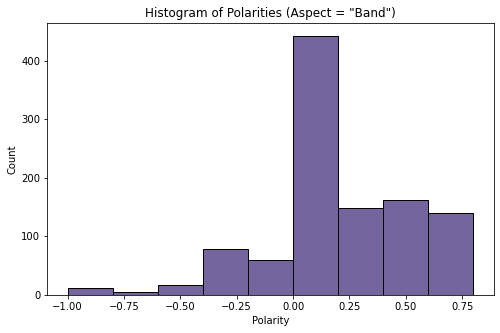

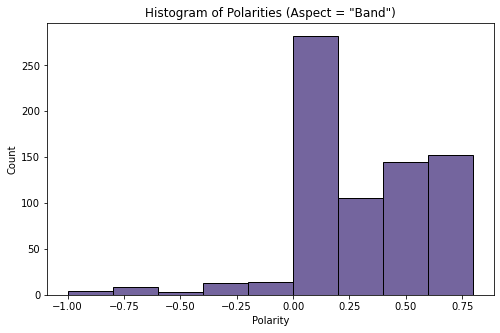

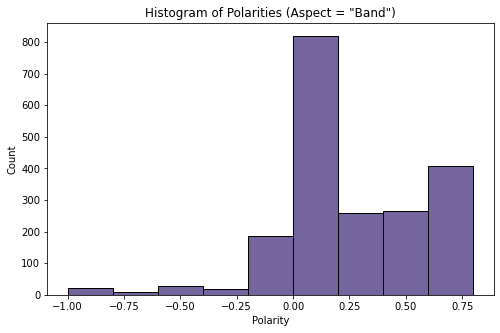

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(df_band["Polarity"],
                  bins=np.arange(-1,1,0.2)
                  ).set_title('Histogram of Polarities (Aspect = "Band")')
plt.show()
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(df_battery["Polarity"],
                  bins=np.arange(-1,1,0.2)
                  ).set_title('Histogram of Polarities (Aspect = "Band")')
plt.show()
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(df_display["Polarity"],
                  bins=np.arange(-1,1,0.2)
                  ).set_title('Histogram of Polarities (Aspect = "Band")')
plt.show()
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(df_design["Polarity"],
                  bins=np.arange(-1,1,0.2)
                  ).set_title('Histogram of Polarities (Aspect = "Band")')
plt.show()
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(df_price["Polarity"],
                  bins=np.arange(-1,1,0.2)
                  ).set_title('Histogram of Polarities (Aspect = "Band")')
plt.show()